<a href="https://colab.research.google.com/github/qubaylAlqahtani/MLRepo/blob/feature%2Ffirst-ml-project/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**About The Project **
In this project I'm going to build and evalute some of the most common ML algorithms to see which model best suit our supervised machine learning problem, which is predicting weither or not a pregnant women has a hight chance of having Diabetes or not to help the hospital staff shorten the testing time and effort.  I'm going to build a model that will predict the class of new, unseen data.
####Below are the main Steps or phases that I will go through in this project:


* Define Problem
* Prepare Data
* Explore Data
* Build and Evaluate the Model
* Present Results











##     Define Problem
The problem we are trying to solve is predicting the class of a patient having diabetes or not, it's a supervised learning problem where we predict the class of new data (new patient) based on labeled training data. . 

In [0]:
# Check Versions
import sys
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

print('Python: {}\nscipy: {} \nnumpy: {}\nmatplotlib: {}\npandas: {}\nsklearn: {}'.format(sys.version, scipy.__version__, np.__version__, matplotlib.__version__, pd.__version__, sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
scipy: 1.1.0 
numpy: 1.14.6
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.20.2


In [0]:
# Load libraries.
# Below are the libraries that we are going to use in this project. 
!pip install xlrd

import io
from google.colab import files
from pandas.plotting import scatter_matrix

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Preparing  Data 
###Introduction 
Saudi Arabia is one of the 19 countries of the IDF MENA (Middle East and
North Africa) region, where out of the 415 million people having diabetes in the
world more than 35.4 million people are in the MENA Region. Furthermore, by
2040 this number will rise to 72.1 million. There were 3.4 million cases of diabetes
in Saudi Arabia in 2015. The Dataset is obtained from a Saudi Hospital. 

###About the Dataset
There are 110 (55%) cases in class (1) and 90 (45%) cases in class (0), Where (1) means a positive test for diabetes and (0) is a negative test for diabetes.

**Diabetes features information is given below:**
1. Medical Registration Number 
2. Hemoglobin A1C HBA1C. 
3. Age (years).
4. Body mass index (weight in kg/ (height in m)2).
5. Diastolic blood pressure (mm Hg).
6. Glucose tolerance test Fasting Plasma Glucose(FBS).
7. Glucose tolerance test at 1 hours(1H).
8. Glucose tolerance test at 2 hours(2H).
9. PARITY, Number of times pregnant, gravidity means female is or has been pregnant (G), parity means carried the pregnancies to a viable gestational age.
10. Gestational Diabetes Mellitus.

In [0]:
# Load dataset.
uploaded = files.upload()

dataset = pd.read_excel(io.BytesIO(uploaded['Diabetes dataset.xlsx']))
dataset.head()

Saving Diabetes dataset.xlsx to Diabetes dataset.xlsx


,MRN,HBA1C,AGE,BMI,DIASTOLICBP,GTTFBS,GTT1H,GTT2H,PARITY,GDMCLASSIFICATION
0,1,10.2,24,34,82,10.75,NaN,NaN,G1P0,GDM ON INSULIN
1,2,6.4,39,34,73,6.27,NaN,7.2,G11P5,GDM ON INSULIN
2,3,5.3,32,37,75,4.11,NaN,4.6,G3P2,GDM ON ORAL
3,4,NaN,34,28,71,7.76,NaN,NaN,G3P0,GDM ON ORAL
4,5,5.9,37,37,80,5.53,10.2,8.9,G5P4,GDM ON ORAL


## Exploring the Data
####In this step we are going to take a look at the data a few different ways:
* Dimensions of the dataset
* Statistical summary of all attributes
* Breakdown of the data by the class variable
* Location of estimates of the dataset(Mean, Median)
* Variability of the dataset (Variance, Standard deviation)

In [0]:
# Overview look 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
MRN                  200 non-null int64
HBA1C                83 non-null float64
AGE                  200 non-null int64
BMI                  200 non-null int64
DIASTOLICBP          200 non-null int64
GTTFBS               188 non-null float64
GTT1H                146 non-null float64
GTT2H                161 non-null float64
PARITY               200 non-null object
GDMCLASSIFICATION    200 non-null object
dtypes: float64(4), int64(4), object(2)
memory usage: 15.7+ KB


In [0]:
# Dimentions (rows, columns)
dataset.shape

(200, 10)

In [0]:
# Statistical Summary 
dataset.describe()

,MRN,HBA1C,AGE,BMI,DIASTOLICBP,GTTFBS,GTT1H,GTT2H
count,200.000000,83.000000,200.000000,200.000000,200.000000,188.000000,146.000000,161.000000
mean,100.500000,6.387952,31.750000,31.705000,71.755000,5.186330,8.764384,7.293789
std,57.879185,1.275701,6.342605,5.508146,8.756045,1.473738,2.523401,2.756009
min,1.000000,4.300000,16.000000,20.000000,37.000000,3.570000,4.100000,2.800000
25%,50.750000,5.600000,27.000000,28.000000,66.000000,4.275000,6.825000,5.100000
50%,100.500000,6.000000,32.000000,32.000000,72.000000,4.695000,8.400000,6.800000
75%,150.250000,6.700000,36.000000,35.000000,79.000000,5.590000,10.400000,8.900000
max,200.000000,10.500000,46.000000,48.000000,91.000000,11.700000,16.000000,18.100000


In [0]:
# Class distribution 
class_size = dataset.groupby('GDMCLASSIFICATION').size()
print((class_size/sum(class_size))* 100)

GDMCLASSIFICATION
DM        55.0
NORMAL    45.0
dtype: float64


###Data Preprocessing <br>
Preparing our dataset before using it in our analysis is the most important part of building the prediction model. <br>
Data preprocessing includes: 
1. Handling missing data.
2. Mapping values.
3. Encoding categories into numbers (Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.). 
4. Splitting the dataset into Training and Testing (This step will be performed after we finish our EDA). 


In [0]:
#Check for null values 
dataset.isnull().sum()

MRN                    0
HBA1C                117
AGE                    0
BMI                    0
DIASTOLICBP            0
GTTFBS                12
GTT1H                 54
GTT2H                 39
PARITY                 0
GDMCLASSIFICATION      0
dtype: int64

**Note: **In our case null examples are represented as NaN as you can see below. So we need to fill them with values. 

In [0]:
dataset.head()

,MRN,HBA1C,AGE,BMI,DIASTOLICBP,GTTFBS,GTT1H,GTT2H,PARITY,GDMCLASSIFICATION
0,1,10.2,24,34,82,10.75,NaN,NaN,G1P0,DM
1,2,6.4,39,34,73,6.27,NaN,7.2,G11P5,DM
2,3,5.3,32,37,75,4.11,NaN,4.6,G3P2,DM
3,4,NaN,34,28,71,7.76,NaN,NaN,G3P0,DM
4,5,5.9,37,37,80,5.53,10.2,8.9,G5P4,DM


In [0]:
dataset.describe()

,MRN,HBA1C,AGE,BMI,DIASTOLICBP,GTTFBS,GTT1H,GTT2H
count,200.000000,83.000000,200.000000,200.000000,200.000000,188.000000,146.000000,161.000000
mean,100.500000,6.387952,31.750000,31.705000,71.755000,5.186330,8.764384,7.293789
std,57.879185,1.275701,6.342605,5.508146,8.756045,1.473738,2.523401,2.756009
min,1.000000,4.300000,16.000000,20.000000,37.000000,3.570000,4.100000,2.800000
25%,50.750000,5.600000,27.000000,28.000000,66.000000,4.275000,6.825000,5.100000
50%,100.500000,6.000000,32.000000,32.000000,72.000000,4.695000,8.400000,6.800000
75%,150.250000,6.700000,36.000000,35.000000,79.000000,5.590000,10.400000,8.900000
max,200.000000,10.500000,46.000000,48.000000,91.000000,11.700000,16.000000,18.100000


##Mapping values <br>
Unfortuantly our dataset is small, so even if we build the model to predict the GDM-CLASSIFICATION categories we will get bad model accuarcy.<br>

For that reason we are going to map the GDM-CLASSIFICATION values into two classes, **Normal and Diabetes**. 

In [0]:
dataset['GDMCLASSIFICATION'].value_counts()

DM        110
NORMAL     90
Name: GDMCLASSIFICATION, dtype: int64

In [0]:
dataset['GDMCLASSIFICATION'].replace({'GDM ON DIET':'DM',
                                       'DM ON INSULIN':'DM',
                                       'GDM ON INSULIN':'DM',
                                       'GDM ON ORAL':'DM'}, inplace=True)
dataset['GDMCLASSIFICATION'].value_counts() 

DM        110
NORMAL     90
Name: GDMCLASSIFICATION, dtype: int64

Before filling the NaN values with the **Mean or Median** we have to know first which one of them best represents our population, and for that we need to measure the **Location of Estimates** first. 

###Location of Estimates
In ideal world we would know the exact statistical values of our population, but in reality that is not the case. **Location of estimates** helps us  determine whether or not this sample can reasonably represent our population.<br><br>
We are going to cover the two main estimates of location which are **Mean and Median**. <br>
We will then check if there are any **outliers** because if there are any we can not use the mean as a representative value of our pupulation as it is senstive to extreme values (outliers) and we would have to use the median instead. 

In [0]:
# Checking for null values 
print('Dataset total rows count: {0}'.format(dataset.shape[0]))
dataset.isnull().sum()


Dataset total rows count: 200


MRN                  0
AGE                  0
BMI                  0
DIASTOLICBP          0
GTTFBS               0
GTT2H                0
PARITY               0
GDMCLASSIFICATION    0
dtype: int64

##Handling Missing Values 
Keep in mind, before we fill NaN values we need to know first which columns should we NOT include in our model, Theoretically, 25 to 30% is the maximum missing values are allowed, beyond which we might want to drop the variable from analysis. <br><br>
In our case, we will be dropping two columns which are Hemoglobin A1C HBA1C "HBA1C" and  Glucose tolerance test at 1 hours(1H) "GTT1H" as shown in the cells below.
<br>
Also we need to decide which estimate of location to use, will make it simple and with either **mean or median**.<br>
box plots and histograms are greate visuals that will help us in achieving this goal.

In [0]:
for col in dataset.columns:
  if dataset[col].isnull().sum()/dataset[col].count() > 0.30:
    print(col)

In [0]:
dataset = dataset.drop(['HBA1C', 'GTT1H'], axis = 1)
dataset.head()

,MRN,AGE,BMI,DIASTOLICBP,GTTFBS,GTT2H,PARITY,GDMCLASSIFICATION
0,1,24,34,82,10.75,NaN,G1P0,DM
1,2,39,34,73,6.27,7.2,G11P5,DM
2,3,32,37,75,4.11,4.6,G3P2,DM
3,4,34,28,71,7.76,NaN,G3P0,DM
4,5,37,37,80,5.53,8.9,G5P4,DM


In [0]:
dataset.isnull().sum()

MRN                   0
AGE                   0
BMI                   0
DIASTOLICBP           0
GTTFBS               12
GTT2H                39
PARITY                0
GDMCLASSIFICATION     0
dtype: int64

In [0]:
values = {'GTTFBS': dataset['GTTFBS'].mean(), 'GTT2H':dataset['GTT2H'].mean()}

dataset = dataset.fillna(value=values)
dataset.head()

,MRN,AGE,BMI,DIASTOLICBP,GTTFBS,GTT2H,PARITY,GDMCLASSIFICATION
0,1,24,34,82,10.75,7.293789,G1P0,DM
1,2,39,34,73,6.27,7.200000,G11P5,DM
2,3,32,37,75,4.11,4.600000,G3P2,DM
3,4,34,28,71,7.76,7.293789,G3P0,DM
4,5,37,37,80,5.53,8.900000,G5P4,DM


##Note<br>
To know **which estimate best represnents our pobulation**, we need to visualize both of them. Also as we just want numeric features, we will exclude **"PARITY"** and will come back to it later on the feature engneering section. 

#Feature Engneering 

In [0]:
dataset['PARITY'].value_counts().head()

G1P0    52
G2P1    29
G3P2    17
G5P4    13
G4P3     8
Name: PARITY, dtype: int64

In [0]:
temp_col = dataset['PARITY'].str.split('P', n = 1, expand = True)

dataset['no_pregnant'] = temp_col[1].replace('O', '0').apply(lambda x: x.strip()).astype(int)
print(dataset['no_pregnant'].head())


dataset['no_gravidity'] = temp_col[0].str.split('G', n = 1, expand = True)[1].replace('O', '0').apply(lambda x: x.strip()).astype(int)
print(dataset['no_gravidity'].head())


0    0
1    5
2    2
3    0
4    4
Name: no_pregnant, dtype: int64
0     1
1    11
2     3
3     3
4     5
Name: no_gravidity, dtype: int64


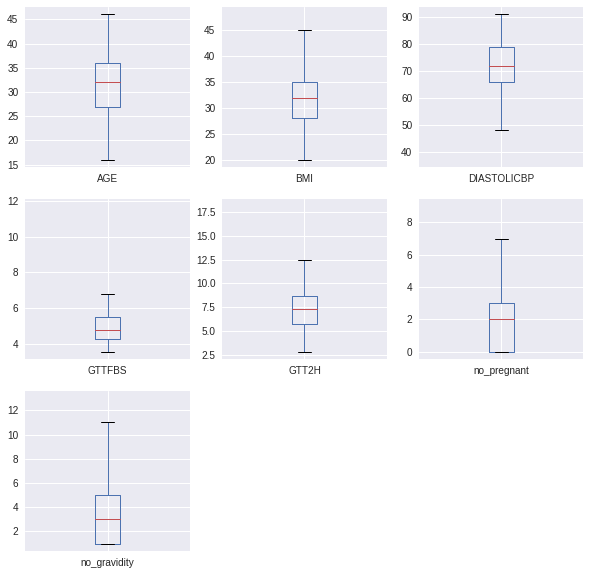

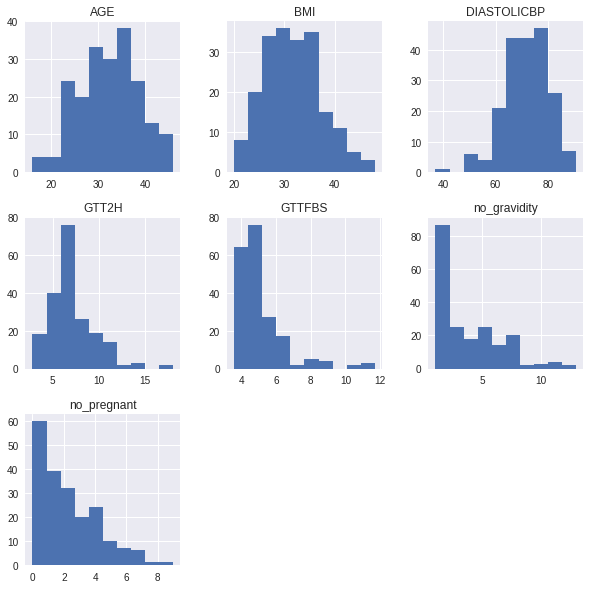

In [0]:
# Exclude MRN as it's a unique ID for the patient 
numeric_cols = ['AGE', 	'BMI', 	'DIASTOLICBP', 	'GTTFBS', 'GTT2H', 'no_pregnant', 'no_gravidity']
# box and whisker plots
dataset[numeric_cols].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10, 10))
plt.show()

# histograms 
dataset[numeric_cols].hist(figsize=(10, 10))
plt.show()



In [0]:
dataset_na_mean.isnull().sum()

MRN                  0
AGE                  0
BMI                  0
DIASTOLICBP          0
GTTFBS               0
GTT2H                0
PARITY               0
GDMCLASSIFICATION    0
no_pregnant          0
no_gravidity         0
dtype: int64

In [0]:
dataset.head() 

,MRN,AGE,BMI,DIASTOLICBP,GTTFBS,GTT2H,PARITY,GDMCLASSIFICATION,no_pregnant,no_gravidity
0,1,24,34,82,10.75,7.293789,G1P0,DM,1.000000e-15,1
1,2,39,34,73,6.27,7.200000,G11P5,DM,5.000000e+00,11
2,3,32,37,75,4.11,4.600000,G3P2,DM,2.000000e+00,3
3,4,34,28,71,7.76,7.293789,G3P0,DM,1.000000e-15,3
4,5,37,37,80,5.53,8.900000,G5P4,DM,4.000000e+00,5


###Splitting the dataset into training and testing <br>
In order to train the model and calculate it's accuracy we need to split our dataset into a training and testing examples. 

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[numeric_cols], dataset['GDMCLASSIFICATION'], test_size=0.33, random_state=42)

##Building and Evaluating Models

In [0]:
dataset_na_mean.head()

,MRN,AGE,BMI,DIASTOLICBP,GTTFBS,GTT2H,PARITY,GDMCLASSIFICATION,no_pregnant,no_gravidity
0,1,24,34,82,10.75,7.293789,G1P0,DM,0,1
1,2,39,34,73,6.27,7.200000,G11P5,DM,5,11
2,3,32,37,75,4.11,4.600000,G3P2,DM,2,3
3,4,34,28,71,7.76,7.293789,G3P0,DM,0,3
4,5,37,37,80,5.53,8.900000,G5P4,DM,4,5


In [0]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


99.25

In [0]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


85.82

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.31

In [0]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

91.04

In [0]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


71.64

In [0]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.6

In [0]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


55.22

In [0]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [0]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [0]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
0,Support Vector Machines,99.25
4,Naive Bayes,91.04
1,KNN,87.31
2,Logistic Regression,85.82
7,Linear SVC,80.60
5,Perceptron,71.64
6,Stochastic Gradient Decent,55.22
